# 1. 회귀 (Regression)

* ( 분류 )는 범주형 클래스 값을 예측하고, ( 회귀 )는 연속적인 숫자값을 예측합니다.

* ( 회귀 분석 ) : 독립변수와 종속변수 간의 상관관계를 분석하는 방법 [위키백과](https://ko.wikipedia.org/wiki/%ED%9A%8C%EA%B7%80_%EB%B6%84%EC%84%9D)

  * ( 단순회귀 ) : 하나의 종속변수와 하나의 독립변수 사이의 관계를 분석
  * ( 다중회귀 ) : 하나의 종속변수와 여러 독립변수 사이의 관계를 분석할 경우

* 아파트 가격 예측을 예로 들어봅시다. 아파트 가격에 영향을 주는 요소에는 집크기, 방개수, 주변학군 등 여러가지가 있습니다. 

  * 집크기, 방개수, 주변학군, 역과의 거리 등 : X1, X2, X3 .. Xn (독립변수)
  * 아파트 가격 : y (종속변수)

  * 독립변수가 종속변수에 어떻게 영향을 미치는가를 식으로 나타내면?
  * y = W1 * X1 + W2 * X2 + W3 * X3 + .. Wn * Xn + W0
  * W1, W2, W3 .. Wn : 독립변수의 값에 영향을 미치는 회귀 계수(coefficients)
  * W0 : 절편(intercept)

* 머신러닝 회귀의 핵심은 주어진 X값과 y값으로 학습을 통해 최적의 회귀 계수를 찾아내는 것입니다.

# 2. 다중 회귀 분석 (Multiple Regression) : 독립변수가 2개 이상인 회귀 분석

* OLS  (Ordinary Least Squares, 최소자승법) : LinearRegression 클래스는 예측값과 실제값의 RSS (Residual Sum of Squares)를 최소화하는 OLS(Ordinary Least Squares) 추정 방식으로 구현한 클래스

* 다항 회귀 (Polynomial Regression)

* 규제 선형 모델 : Ridge, Lasso, ElasticNet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

In [3]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(housing['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
housing.data[0]

array([   8.3252    ,   41.        ,    6.98412698,    1.02380952,
        322.        ,    2.55555556,   37.88      , -122.23      ])

In [8]:
housing.target[0]

4.526

In [11]:
df = pd.DataFrame(data=housing.data, columns=housing.feature_names)
df['Price'] = housing.target

In [12]:
# 데이터 확인하기
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [13]:
# 열 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


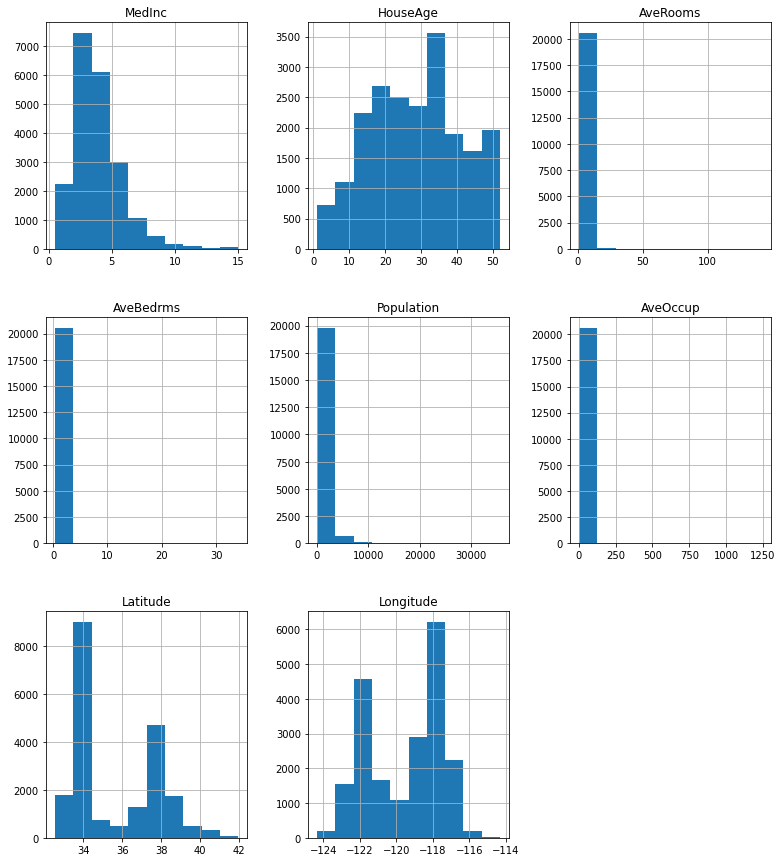

In [32]:
fig = plt.figure(figsize=(13,15))
ax = fig.gca()

df[housing.feature_names].hist(ax=ax)
plt.show()

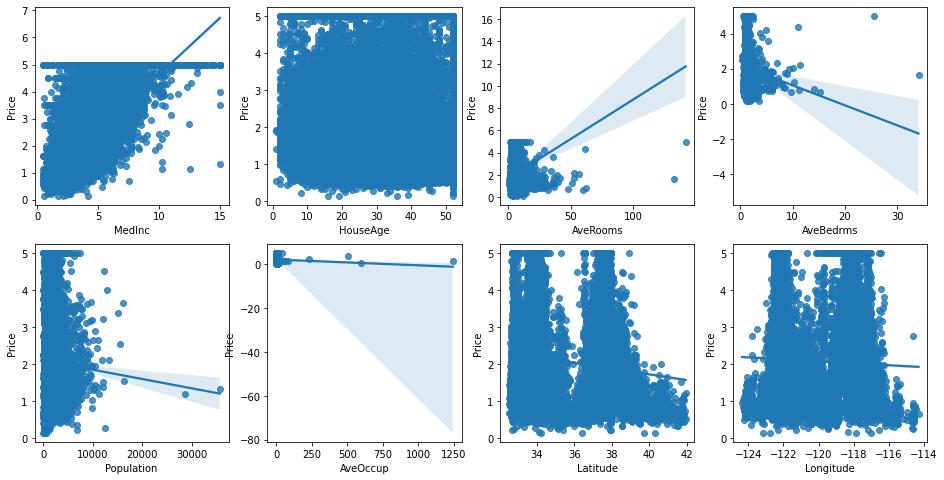

In [15]:
# 시각화하기
# regplot : 산점도 + 선형회귀직선
fig, axes = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
for i, feature in enumerate(housing.feature_names):
  row = int(i/4)
  col = i%4
  sns.regplot(x=feature, y='Price', data=df, ax=axes[row][col])
plt.show()

In [26]:
# 데이터 분리하기
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.3, random_state=11)
X_train.shape, X_test.shape

((14448, 8), (6192, 8))

In [27]:
# 선형회귀 학습하기
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# 선형회귀 예측하기
pred = lr.predict(X_test)

In [29]:
# 선형회귀 평가하기
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, pred)
rmse = np.sqrt(mse)

print('MSE: %.3f, RMSE: %.3f' % (mse, rmse))
print('R2 score: %.3f' % r2_score(y_test, pred))

MSE: 0.537, RMSE: 0.733
R2 score: 0.597


In [33]:
# 회귀 계수 확인하기
lr.coef_, lr.intercept_

(array([ 4.39501362e-01,  9.21168992e-03, -1.09006212e-01,  6.04846584e-01,
        -6.76829129e-06, -3.30692700e-03, -4.17158582e-01, -4.32396095e-01]),
 -36.79039929080466)

In [34]:
print(lr.score(X_train, y_train))  # R-Squared 리턴
print(lr.score(X_test, y_test))

0.6095299140758144
0.5970513176335808
